In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("diabetes.csv")

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
zero_not_accepted=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in zero_not_accepted:
  dataset[column]=dataset[column].replace(0,np.NaN)
  mean=int(dataset[column].mean(skipna=True))
  dataset[column]=dataset[column].replace(np.NaN,mean)

In [8]:
print(dataset['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [10]:
X=dataset.iloc[:,0:8]
y=dataset.iloc[:,8]

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [13]:
Standard_Scaler=StandardScaler()
X_train=Standard_Scaler.fit_transform(X_train)
X_test=Standard_Scaler.transform(X_test)

In [14]:
classifier=KNeighborsClassifier(n_neighbors=11,metric="euclidean")

In [15]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [16]:
y_pred=classifier.predict(X_test)

In [18]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
cm=confusion_matrix(y_test,y_pred)

In [19]:
print(cm)

[[94 13]
 [15 32]]


In [20]:
print(f1_score(y_test,y_pred))

0.6956521739130436


In [21]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



In [24]:
error_rate=[]

for i in range(1,40):
   classifier=KNeighborsClassifier(n_neighbors=i,metric="euclidean")
   classifier.fit(X_train,y_train)
   y_pred=classifier.predict(X_test)
   error_rate.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'Error rate')

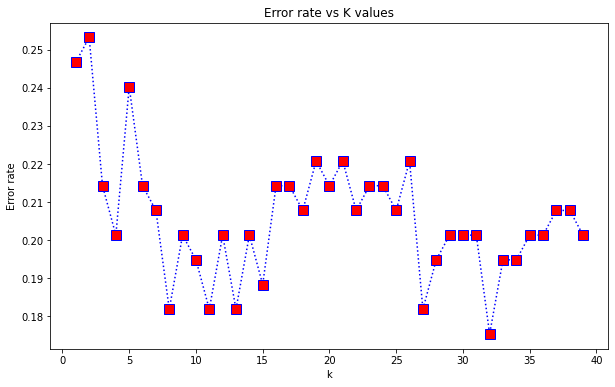

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dotted",marker='s',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K values')
plt.xlabel('k')
plt.ylabel('Error rate')

In [33]:
classifier=KNeighborsClassifier(n_neighbors=33,metric="euclidean")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154

